In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import requests

In [2]:
etf = 'SPY'

In [3]:
# Getting the tickers of the sp500 from a publicly listed ETF
def get_etf_holdings_ticks():
    # Importing the necessary libraries for getting the tickers
    import requests
    import os
    import xlwings as xw
    import datetime as dt

    # URL path of the folder directory of where I have the ETF holdings files saved
    destination_dir = '/Users/stevenfernandez/Desktop/Python Class/Quant_Fin_Projects_Assignments/Quant_Fin_CCNY-BIZ-BETZ_Spring_2024_SF_MM/berry_cox_price_momentum_port_gen'
    
    # Getting todays date
    today_date = dt.datetime.today().date()

    # Getting todays month out of todays date
    month = today_date.month

    # Getting todays year out of todays date
    year = today_date.year

    # Filename to save the downloaded file, adding the month and year to the file name to keep a trail of the file to check in the future if we have the file based on month and year it was downloaded to the folder directory
    filename = f"state_street_etf_holdings_{month}_{year}.xlsx"
    
    # Combining the destination folder directory with the file name to get the file path
    file_path = os.path.join(destination_dir, filename)

    # Conditional statement ot check if the file exists within our folder directory, if it exists it will open the file and get the tickers. If it doesnt exists it dowloads a new file, saves it on the folder directory, and extracts the tickers from the file
    if not os.path.exists(file_path):
      
        # URL of the Excel file to download from State Street's website
        url = "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx"

        # Sending a request to the URL to download the file
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:

            with open(file_path, "wb") as file:
                file.write(response.content)
            
            print("File downloaded successfully and saved as:", filename)
        
        else:
            
            print("Failed to download the file. Status code:", response.status_code)
        
        # Open the Excel file
        wb = xw.Book(file_path)

        # Select the worksheet
        sheet = wb.sheets[0]  # getting the first sheet within the Excel file

        # Find the last row of data in column B starting in row 6. this is the same as selecting cell B6 and clicking buttons command shift down, selecting all of the cells from B6 to the last row of data
        last_row = sheet.range('B6').end('down').row

        # Select the range of data in column B from the 6th row to the last row
        tickers = sheet.range(f'B6:B{last_row}').value

        # Close the workbook
        wb.close()
    
    else:

        # Open the Excel file
        wb = xw.Book(file_path)

        # Select the worksheet
        sheet = wb.sheets[0]  # getting the first sheet within the Excel file

        # Find the last row of data in column B starting in row 6. this is the same as selecting cell B6 and clicking buttons command shift down, selecting all of the cells from B6 to the last row of data
        last_row = sheet.range('B6').end('down').row

        # Select the range of data in column B from the 6th row to the last row
        tickers = sheet.range(f'B6:B{last_row}').value

        # Close the workbook
        wb.close()
        
    return tickers

In [4]:
etf_holdings_ticks = get_etf_holdings_ticks() # Getting the stock tickers

In [5]:
# some tickers aren't formatted for Yahoo Finance to read them. they are fixed below by looking for them in our list and replacing them with the format that Yahoo Finance reads them
for i, tick in enumerate(etf_holdings_ticks):
    if tick == 'BRK.B':
        etf_holdings_ticks[i] = 'BRK-B'
    elif tick == 'BF.B':
        etf_holdings_ticks[i] = 'BF-B'
    elif tick == '-': # We take this out of our ticker list because this is what is put for US Dollars under the tickers column
        del etf_holdings_ticks[i] 

In [6]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statement where the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one wants to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [7]:
etf_holdings_price = import_securities_data(etf_holdings_ticks, 20, 'y')[['Adj Close', 'Volume']] # Importing the stocks from the ticker list and getting the adjusted close prices and volume of each stock

etf_holdings_price

[*********************100%%**********************]  503 of 503 completed


Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2004-04-05   19.682007    NaN    0.428137         NaN         NaN   12.060389   
2004-04-06   19.791218    NaN    0.420730         NaN         NaN   12.144750   
2004-04-07   19.330107    NaN    0.412869         NaN         NaN   12.021023   
2004-04-08   19.311911    NaN    0.416194         NaN         NaN   11.900105   
2004-04-12   19.336178    NaN    0.423904         NaN         NaN   11.585172   
...                ...    ...         ...         ...         ...         ...   
2024-03-22  147.449997  14.82  172.279999  178.449997  167.860001  110.570000   
2024-03-25  145.559998  14.92  170.850006  178.529999  167.990005  110.010002   
2024-03-26  144.410004  14.92  169.710007  179.190002  167.389999  111.500000   
2024-03-27  147.369995  15.30  173.309998  180.350006  166.410004  113.480003   
2024-03-28  145.509995  15.35  171.479996  182.100006  164.960007  113.660004   

Price                                                      ...   Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...       WY   
Date                                                       ...            
2004-04-05   4.773333   18.445524   20.655020   32.032284  ...   701300   
2004-04-06   4.724444   18.050777   20.709970   31.362715  ...   769400   
2004-04-07   4.723333   18.043600   20.909777   31.249020  ...   725800   
2004-04-08   4.765556   18.115368   20.974714   31.489063  ...  1001900   
2004-04-12   4.770000   18.445524   21.239456   31.602766  ...   945400   
...               ...         ...         ...         ...  ...      ...   
2024-03-22  90.680000  337.500000  499.519989  193.509995  ...  3826500   
2024-03-25  90.989998  333.820007  507.230011  190.630005  ...  3436300   
2024-03-26  90.589996  336.390015  507.600006  188.960007  ...  3364600   
2024-03-27  91.480003  340.940002  504.399994  193.330002  ...  2810400   
2024-03-28  92.440002  346.609985  504.600006  197.789993  ...  3438300   

Price                                                                        \
Ticker         WYNN      XEL       XOM     XRAY       XYL      YUM      ZBH   
Date                                                                          
2004-04-05   770300  1181500   8649100   836800       NaN  4360229  1365780   
2004-04-06   536400  1695500   7449500   946600       NaN  3135036   904958   
2004-04-07   431600  1326700  10144700   600600       NaN  1817759   884873   
2004-04-08   245300   769900  12242600   838400       NaN  2652359   692778   
2004-04-12   275200  1870000   9950600   483600       NaN  2334098   636952   
...             ...      ...       ...      ...       ...      ...      ...   
2024-03-22   899600  3312600  14695400  1780600  732400.0  1296400  1419200   
2024-03-25  1238100  3022700  14011700  1126400  888100.0  2486600  1242400   
2024-03-26   959100  3498400  13152300  1552200  853400.0  1470400  1080400   
2024-03-27  1090200  3691700  12415700  2225200  959700.0  1634700  1806700   
2024-03-28  1018200  3556400  18482100  2605000  953200.0  1770900  1425300   

Price                          
Ticker        ZBRA        ZTS  
Date                           
2004-04-05  209850        NaN  
2004-04-06  165750        NaN  
2004-04-07  179850        NaN  
2004-04-08  244200        NaN  
2004-04-12  328050        NaN  
...            ...        ...  
2024-03-22  201800  2840500.0  
2024-03-25  449800  2762200.0  
2024-03-26  290600  4550000.0  
2024-03-27  405000  2857700.0  
2024-03-28  376900  3395600.0  

[5030 rows x 1006 columns]

# Momentum factors

In [37]:
factors_df = pd.DataFrame(index= etf_holdings_ticks) # putting the tickers into a pandas dataframe

factors_df

""
MMM
AOS
ABT
ABBV
ACN
...
XYL
YUM
ZBRA
ZBH


In [38]:
selected_time_interval = 252 * 5 # there is 252 trading days per year, multiply times five to get 1,260 days. this will serve as the time interval that we want to look at, we want to look at 5-years of data
lag =20 # number of lags to adjust for look ahead error

In [40]:
def calc_momentum_factors(days_set_back):

    # Setting a varaible to get the date that our data should start from
    from_date = days_set_back + selected_time_interval

    # Setting a variable to get the to date our date should end
    to_date = days_set_back + 1

    # Slicing our date to get our adjusted close prices starting from_date and ending on to_date and then shifting the date by our number of lag
    lagged_adjprices = etf_holdings_price['Adj Close'][-from_date : -to_date].shift(lag).dropna(how = 'all')
    
    # slope for 52-week trend
    lagged_rolling_mean_price = lagged_adjprices.rolling(window= 52*5).mean().dropna(how='all') # 52 week rolling price average
    lagged_rolling_mean_price['day'] = np.arange(1, len(lagged_rolling_mean_price) + 1) # Counting the number of days within the our sliced data

    for stock in lagged_rolling_mean_price.iloc[:,:len(etf_holdings_ticks)].columns: # iterating through the columns to obtain the tickers in the ETF
        
        if lagged_rolling_mean_price[stock].notna().all(): # Conditional statement to check if the values are not null within our data set
            
            slope_52_week_trend = np.polyfit(lagged_rolling_mean_price['day'], lagged_rolling_mean_price[stock], 1)[0].round(3) # if so we run a regression to get the 52 week slope trend
        
        else:
            
            slope_52_week_trend = np.nan # if conditional satetment is not true we assing a nan value to that data
        
        factors_df.loc[stock, '52_week_slope'] = slope_52_week_trend # assigning the slope to the repective ticker in our pandas dataframe

    # percent above 260 day low
    percent_above_260 = (lagged_adjprices - lagged_adjprices.rolling(window= 260).min()) / lagged_adjprices.rolling(window= 260).min() # Calculating the percent above 260 days low
    factors_df['percent_above_260_day_low'] = percent_above_260.dropna(how= 'all').mean().round(3) # Assigning the values to each of its respective ticker in the pandas datafrane

    # calculate 4/52 price oscillator. Formula: (rolling 4 week mean - rolling 52 week mean / rolling 52 week mean * 100)
    price_oscillator = (lagged_adjprices.rolling(window=4*5).mean() - lagged_adjprices.rolling(window=52*5).mean()) / lagged_adjprices.rolling(window=52*5).mean()
    factors_df['4/52week_price_oscillator'] = price_oscillator.dropna(how = 'all').mean().round(3) # Assigning the values to each of its respective ticker in the pandas datafrane

    # Calculating 39 week return and assigning the values to each of its respective ticker in the pandas datafrane
    factors_df['returns_39week_period'] = lagged_adjprices.pct_change(periods= 39 * 5).mean().dropna(how = 'all').round(3)

    # Caculating 51 week volume price trend
    volume_lag_rollmean = etf_holdings_price['Volume'].shift(lag).dropna(how= 'all').rolling(51*5).mean().dropna(how= 'all') # First lagging our volume data, second getting 51 week rolling average volume
    vpt_51wkly = (volume_lag_rollmean * lagged_adjprices.pct_change(periods= 51*5)).cumsum().dropna(how= 'all').round(3) # Getting the product of the returns and volume. Then getting the cumulative sum overtime of the volume price trend

    factors_df['volume_price_trend'] = vpt_51wkly.mean().round(3) # Assigning the values to each of its respective ticker in the pandas datafrane

    # Returning our data frame storing all of the factor calculated data
    return factors_df

In [41]:
# Calculating the factors
factors_df = calc_momentum_factors(0)
factors_df

,52_week_slope,percent_above_260_day_low,4/52week_price_oscillator,returns_39week_period,volume_price_trend
MMM,-0.042,0.216,-0.038,-0.053,-4.000274e+07
AOS,0.026,0.408,0.073,0.124,1.130059e+08
ABT,0.024,0.301,0.038,0.071,5.311716e+08
ABBV,0.099,0.394,0.101,0.184,1.205040e+09
ACN,0.133,0.392,0.075,0.140,2.402358e+08
...,...,...,...,...,...
XYL,0.032,0.416,0.046,0.101,7.974371e+07
YUM,0.046,0.369,0.040,0.068,6.626883e+07
ZBRA,0.043,0.567,0.031,0.121,7.027986e+07
ZBH,-0.012,0.335,-0.006,0.017,1.762113e+07


# z-scores factors

In [42]:
def calculate_z_scores(x): # where x is equal to the momentum factors
    z_scores = (x - x.mean()) / x.std() # standard z score formula. Normalizing our momentum factors
    z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
    # The z-score is the number of standard deviations away from the mean a data point is.
    return z_scores.sort_values(ascending=False) # sorts the z-scores in descending order

In [43]:
long_basket = calculate_z_scores(factors_df)[:10] # selects the top 10 z-scores
short_basket = calculate_z_scores(factors_df)[-10:] # selects the bottom 10 z-scores

print('Long Basket')
print(long_basket)
print('Short Basket')
print(short_basket)

Long Basket
TSLA    42.746881
MRNA    17.806768
SMCI    15.681296
NVDA    15.290856
ENPH    14.001215
NVR     13.153934
AZO     12.184130
BLDR     9.417342
CMG      8.760873
FCX      8.141284
dtype: float64
Short Basket
VZ     -4.660906
BXP    -4.780523
TFX    -5.030184
WBD    -5.053132
WBA    -5.173796
VTRS   -5.250962
ILMN   -5.728599
BAX    -6.091009
FIS    -6.245783
VFC    -7.546110
dtype: float64


# Backtest

In [44]:
# Function method to get the corresponding lagged data from our dataframe based on slicing on the number of days that we set back our data for to perform our back-test
def get_lagged_price_data(days_set_back):
    
    # Setting a varaible to get the date that our data should start from
    from_date = days_set_back + selected_time_interval

    # Setting a variable to get the to date our date should end
    to_date = days_set_back + 1

    # Slicing our date to get our adjusted close prices starting from_date and ending on to_date and then shifting the date by our number of lag
    lagged_adjprices = etf_holdings_price['Adj Close'][-from_date : -to_date].shift(lag).dropna(how = 'all')

    return lagged_adjprices

# function to calculate our cumulative returns
def calculate_cumulative_returns(dataf): 
    
    # Calculating the returns of the provided dataframe
    returns = dataf.pct_change()

    # getting the cumulative return of the dataframe. this is done by getting hte cumulative product over time since returns are compounded overtime
    cumulative_returns = (1 + returns).cumprod().mean(axis=1)*100

    return cumulative_returns

sp500_lagged_prices = get_lagged_price_data(0) # Getting lagged prices for our sp500
long_lagged_prices = sp500_lagged_prices[long_basket.index] # slicing based on the ticker that we have on our calculated long bascket
short_lagged_prices = sp500_lagged_prices[short_basket.index] # slicing based on the ticker that we have on our calculated short bascket

algo_port_prices = pd.merge(short_lagged_prices, long_lagged_prices, left_index= True, right_index= True, how= 'inner') # merging our short and long basket price data to get our portfolio price data

In [45]:
# Getting pricing data, calculating z-scores, getting long and short baskets, getting lagged pricing data for each basket based on data from five years ago to create a back test on data from 5 years agp
momentum_factors_5yr = calc_momentum_factors(252 * 5)
long_basket_5yr = calculate_z_scores(momentum_factors_5yr)[:10]
short_basket_5yr = calculate_z_scores(momentum_factors_5yr)[-10:]


long_lagged_prices_5y = get_lagged_price_data(252 * 5)[long_basket_5yr.index]
short_lagged_prices_5y = get_lagged_price_data(252 * 5)[short_basket_5yr.index]
sp500_lagged_prices_5y = get_lagged_price_data(252 * 5)

algo_port_prices_5y = pd.merge(short_lagged_prices_5y, long_lagged_prices_5y, left_index= True, right_index= True, how= 'inner')

long_lagged_prices_5y

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_45410/4166243644.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  factors_df['returns_39week_period'] = lagged_adjprices.pct_change(periods= 39 * 5).mean().dropna(how = 'all').round(3)
/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_45410/4166243644.py:34: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  vpt_51wkly = (volume_lag_rollmean * lagged_adjprices.pct_change(periods= 51*5)).cumsum().dropna(how= 'all').round(3)


Ticker,NVDA,AMD,AMZN,NVR,ETSY,NFLX,CZR,PAYC,ALGN,AAPL
Date,,,,,,,,,,
2014-04-24,4.271538,4.050000,17.170500,1134.479980,NaN,53.182858,NaN,NaN,52.070000,16.980234
2014-04-25,4.214678,3.910000,16.923500,1142.290039,NaN,52.025715,NaN,NaN,51.430000,16.907253
2014-04-28,4.240738,3.880000,16.914499,1141.849976,NaN,51.267143,NaN,NaN,50.730000,16.888376
2014-04-29,4.243109,4.010000,16.818501,1147.000000,NaN,50.290001,NaN,NaN,51.790001,16.884604
2014-04-30,4.418422,4.070000,17.149500,1148.979980,NaN,52.098572,NaN,NaN,53.590000,17.039057
...,...,...,...,...,...,...,...,...,...,...
2019-03-20,39.327770,23.950001,81.105003,2590.300049,54.180000,359.910004,47.439999,175.833771,253.789993,41.403271
2019-03-21,38.638199,23.920000,80.972000,2643.850098,53.029999,356.970001,47.349998,177.710907,250.229996,41.169819
2019-03-22,39.486526,24.360001,81.578003,2680.000000,56.669998,363.019989,48.660000,183.024460,253.990005,41.629505


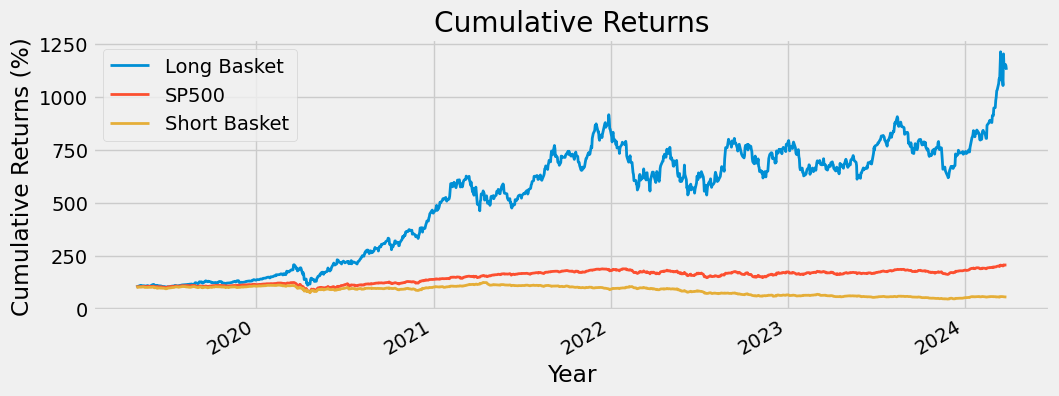

In [46]:

cumm_rets = calculate_cumulative_returns(sp500_lagged_prices) # Getting cumulative returns for the sp500
long_cumm_rets = calculate_cumulative_returns(long_lagged_prices) # Getting cumulative returns for the long basket
short_cumm_rets = calculate_cumulative_returns(short_lagged_prices) # Getting cumulative returns for our short basket
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
long_cumm_rets.plot(label='Long Basket', lw=2) # lw is line width
cumm_rets.plot(label='SP500', lw =2)
short_cumm_rets.plot(label='Short Basket', lw=2)

plt.legend()
plt.title('Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()


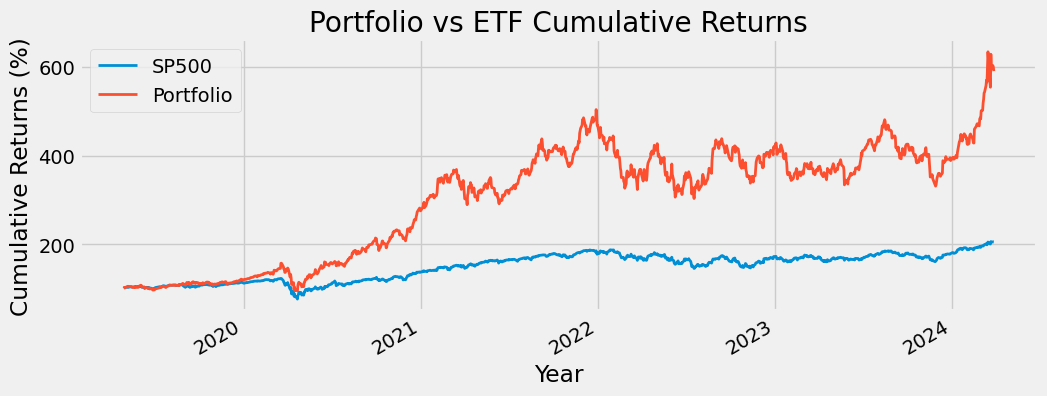

In [47]:
cumm_rets = calculate_cumulative_returns(sp500_lagged_prices) # Getting cumulative returns for the sp500
algo_port_cumm_rets = calculate_cumulative_returns(algo_port_prices) # Getting cumulative returns for the portfolio of long and short baskets
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
cumm_rets.plot(label='SP500', lw =2)
algo_port_cumm_rets.plot(label='Portfolio', lw=2)

plt.legend()
plt.title('Portfolio vs ETF Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_45410/343030926.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = dataf.pct_change()


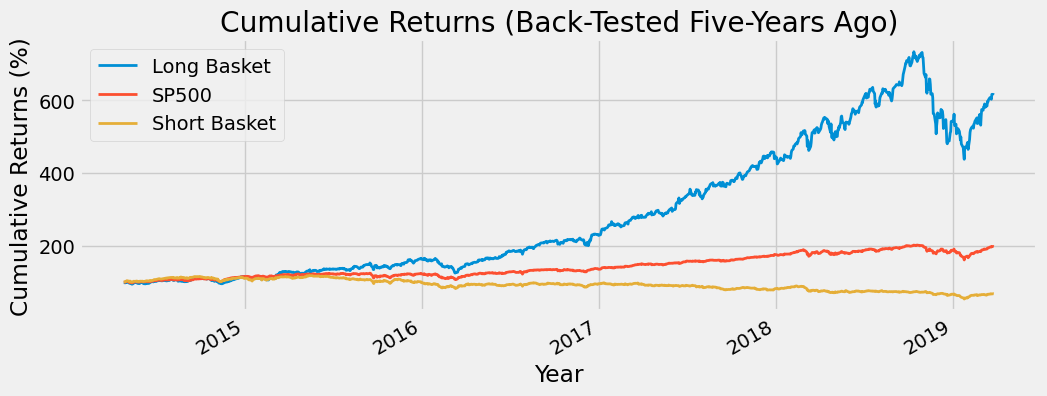

In [48]:
cumm_rets_5yr = calculate_cumulative_returns(sp500_lagged_prices_5y) # Getting cumulative returns for the sp500 based on data from 5 years ago
long_cumm_rets_5yr = calculate_cumulative_returns(long_lagged_prices_5y) # Getting cumulative returns for the short basket based on data from 5 years ago
short_cumm_rets_5yr = calculate_cumulative_returns(short_lagged_prices_5y) # Getting cumulative returns for the long basket based on data from 5 years ago

plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
long_cumm_rets_5yr.plot(label='Long Basket', lw=2) # lw is line width
cumm_rets_5yr.plot(label='SP500', lw =2)
short_cumm_rets_5yr.plot(label='Short Basket', lw=2)

plt.legend()
plt.title('Cumulative Returns (Back-Tested Five-Years Ago)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_45410/343030926.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = dataf.pct_change()


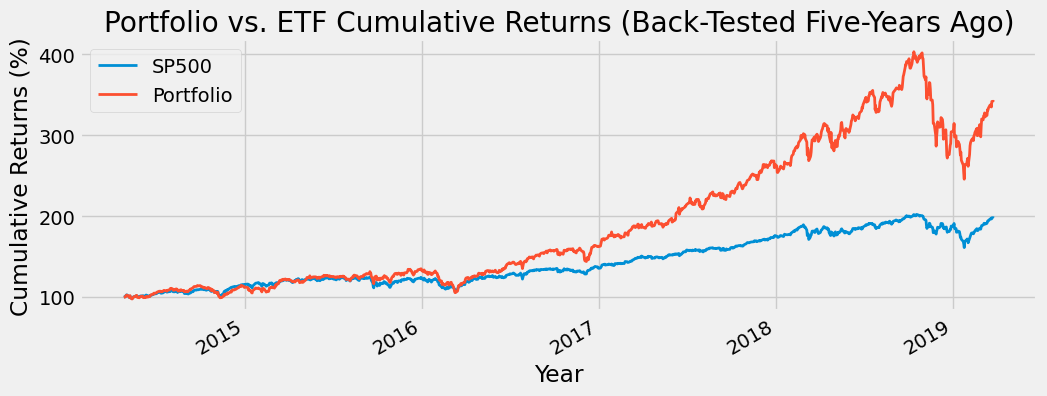

In [49]:
cumm_rets_5yr = calculate_cumulative_returns(sp500_lagged_prices_5y) # Getting cumulative returns for the sp500 based on data from 5 years ago
algo_port_cumm_rets_5y = calculate_cumulative_returns(algo_port_prices_5y) # Getting cumulative returns for the protfolio of long and short basket based on data from 5 years ago

plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
cumm_rets_5yr.plot(label='SP500', lw =2)
algo_port_cumm_rets_5y.plot(label='Portfolio', lw=2)

plt.legend()
plt.title('Portfolio vs. ETF Cumulative Returns (Back-Tested Five-Years Ago)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

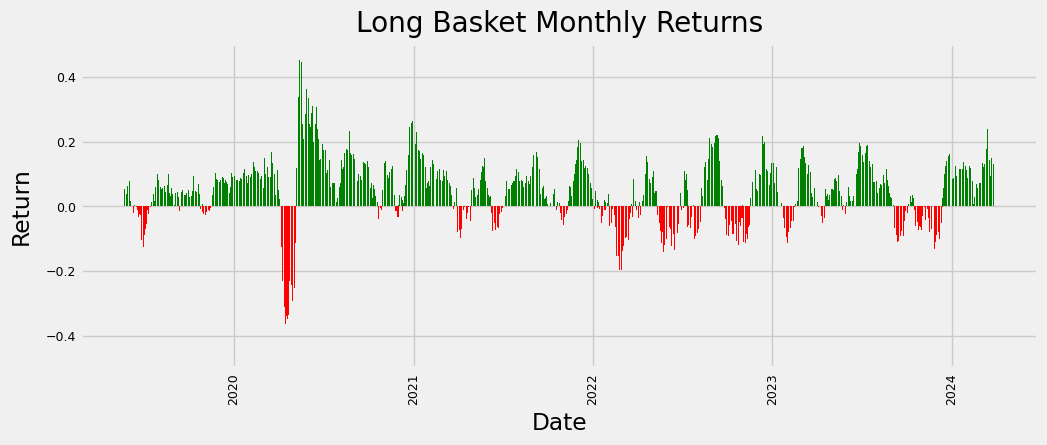

In [51]:
long_lagged_monthly_rets = long_lagged_prices.pct_change(20).mean(axis= 1).dropna(how= 'all') # Calculating the monthly mean return of our long basket portfolio

# Plot the bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
plt.bar(long_lagged_monthly_rets.index, long_lagged_monthly_rets.values, color=['r' if m < 0 else 'g' for m in long_lagged_monthly_rets], width=1.3)

# Customize the plot
plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return', labelpad=9)
plt.xlabel('Date', labelpad=5)
plt.title('Long Basket Monthly Returns', pad=9)
plt.show()

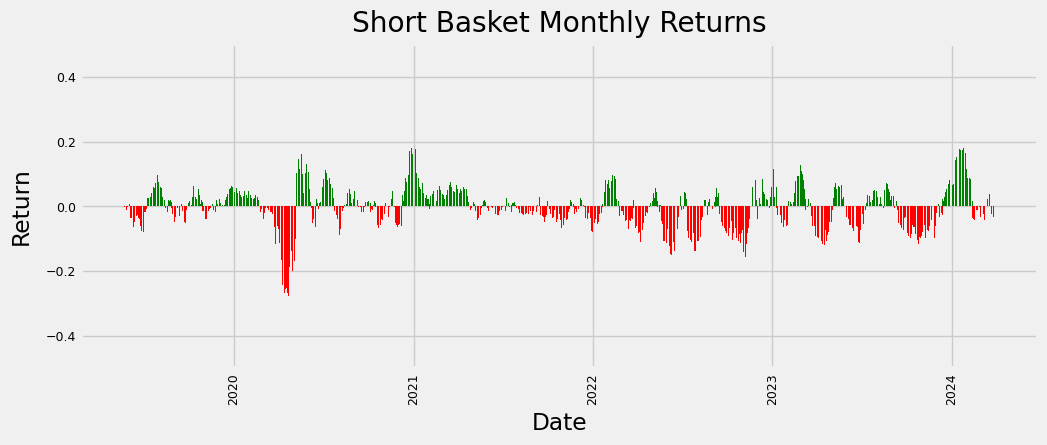

In [52]:
short_lagged_monthly_rets = short_lagged_prices.pct_change(20).mean(axis= 1).dropna(how= 'all') # Calculating the monthly mean return of our short basket portfolio

# Plot the bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
plt.bar(short_lagged_monthly_rets.index, short_lagged_monthly_rets.values, color=['r' if m < 0 else 'g' for m in short_lagged_monthly_rets], width=1.3)

# Customize the plot
plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return', labelpad=9)
plt.xlabel('Date', labelpad=5)
plt.title('Short Basket Monthly Returns', pad=9)
plt.show()

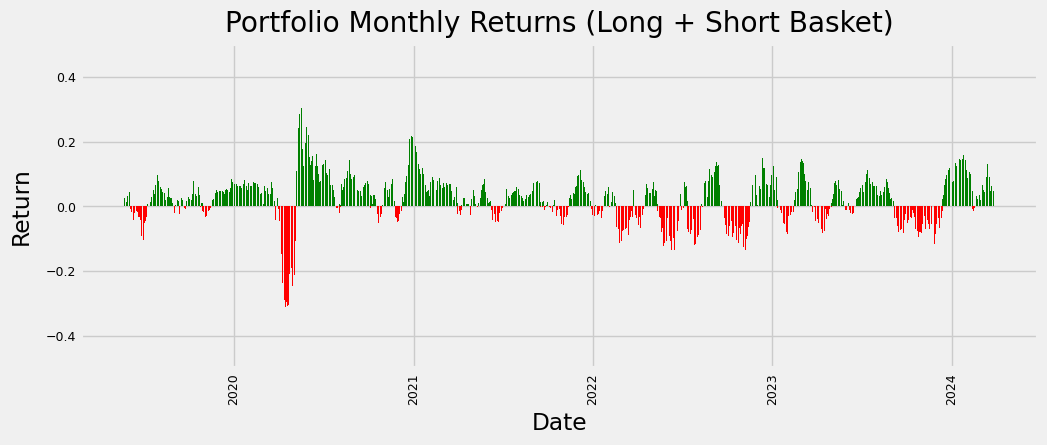

In [55]:
algo_port_prices = pd.merge(short_lagged_prices, long_lagged_prices, left_index= True, right_index= True, how= 'inner') # Merging the adjusted close lagged prices of our long and short basket to create our portfolio prices dataframe

algo_port_lagged_monthly_rets = algo_port_prices.pct_change(20).mean(axis= 1).dropna(how= 'all') # Calculating the monthly mean return of our portfolio of long and short basket

# Plot the bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
plt.bar(algo_port_lagged_monthly_rets.index, algo_port_lagged_monthly_rets.values, color=['r' if m < 0 else 'g' for m in algo_port_lagged_monthly_rets], width=1.3)

# Customize the plot
plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return', labelpad=9)
plt.xlabel('Date', labelpad=5)
plt.title('Portfolio Monthly Returns (Long + Short Basket)', pad=9)
plt.show()

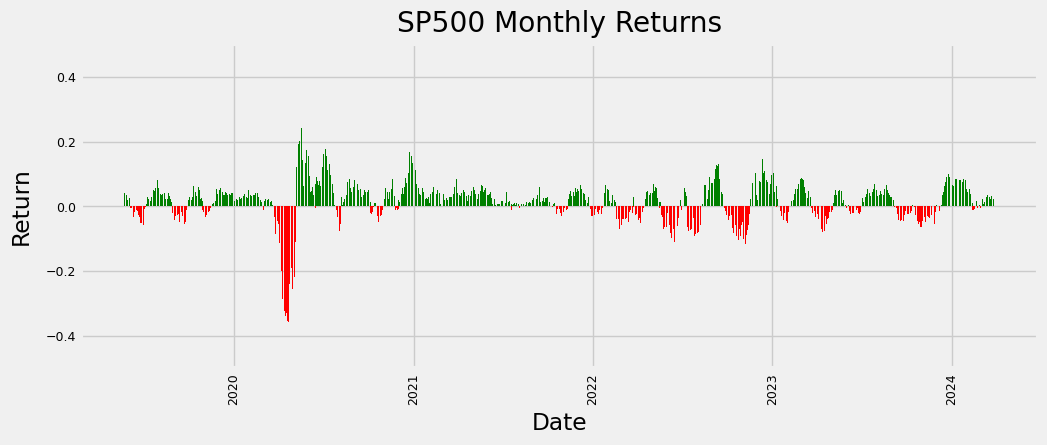

In [56]:
sp500_monthly_rets = sp500_lagged_prices.pct_change(20).mean(axis= 1).dropna(how= 'all') # Calculating the monthly mean return of the sp500

# Plot the bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
plt.bar(sp500_monthly_rets.index, sp500_monthly_rets.values, color=['r' if m < 0 else 'g' for m in sp500_monthly_rets], width=1.3)

# Customize the plot
plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return', labelpad=9)
plt.xlabel('Date', labelpad=5)
plt.title('SP500 Monthly Returns', pad=9)
plt.show()

In [58]:
long_basket.index

Index(['TSLA', 'MRNA', 'SMCI', 'NVDA', 'ENPH', 'NVR', 'AZO', 'BLDR', 'CMG',
       'FCX'],
      dtype='object')

In [63]:
from_date = selected_time_interval
to_date = 1

# Run the efficient frontier and montecarlo python file
%run efficient_frontier_berry_cox.py

# Accesing the class defined within the file and importing the data for our long basket
efficient_frontier = eff_frontier(etf_holdings_price['Adj Close'][-from_date:-to_date][long_basket.index])

# Monte Carlo simulation
efficient_frontier.montecarlo_sim()

In [64]:
efficient_frontier.calc_opt_montecarlo() # calculting the optimal portfolio of the montecarlo

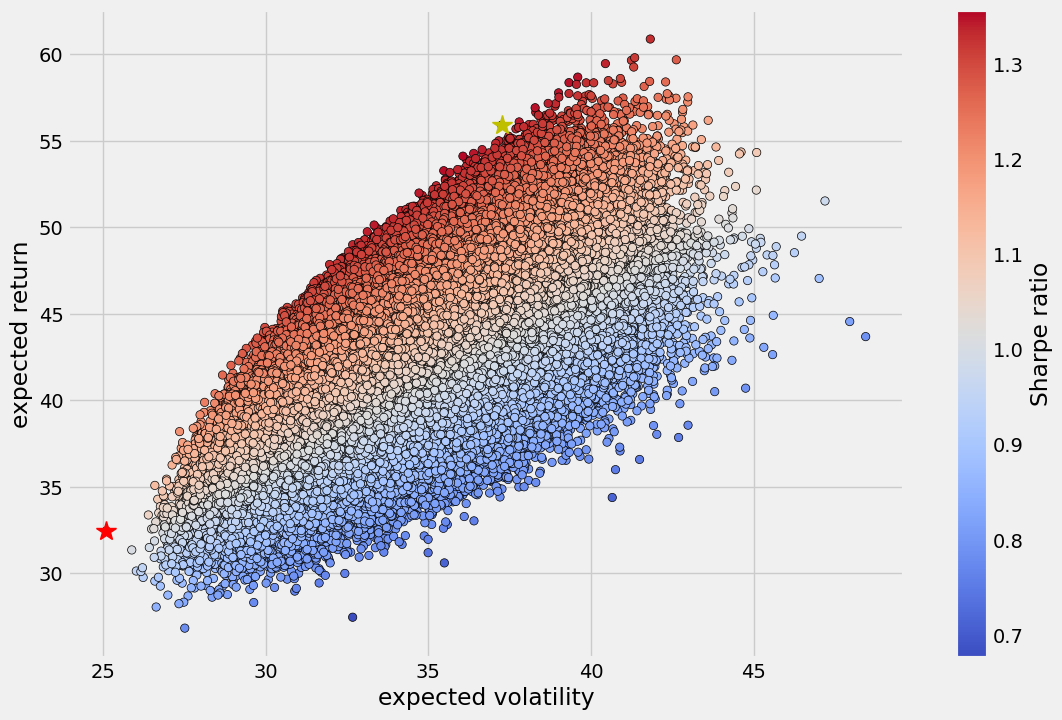

In [65]:
efficient_frontier.plot_montecarlo() # plotting our montecarlo simulation

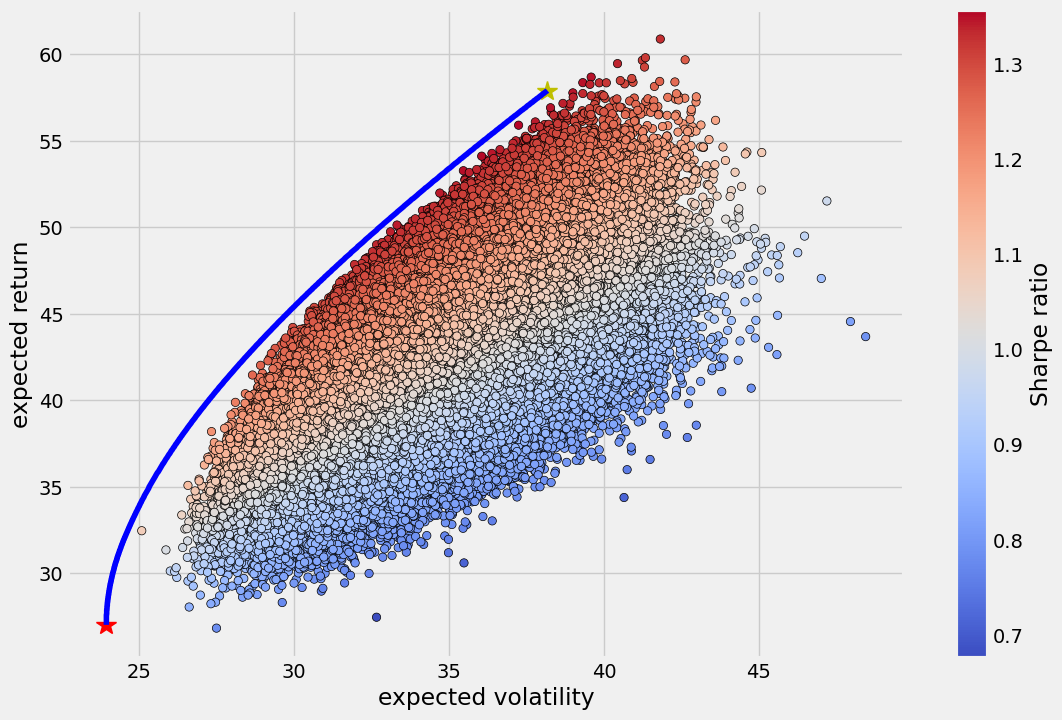

In [66]:
efficient_frontier.calculatedresults() # calucalting our efficient frontier results

efficient_frontier.plot_efficientfront() # plotting our efficient frontier results

In [3]:
efficient_frontier.opt_port # optimal portfolio for our efficient frontier

NameError: name 'efficient_frontier' is not defined

In [84]:
# Read S&P 500 ticker symbols
sp500_tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4)["Ticker"].dropna()

# Replace ".B" with "-B" in ticker symbols, this is the listing for Berkshire Hathaway security
sp500_tickers.replace(["BRK.B", "BF.B"],["BRK-B", "BF-B"], inplace= True)

# Remove "-" from the list, this is the listing for cash in the ETF
sp500_tickers = sp500_tickers[sp500_tickers != "-"].to_list()

# Define start and end dates
start_date = dt.datetime.today() - pd.Timedelta(180, "d")
end_date = dt.datetime.today()

# Download historical data for all S&P 500 tickers
yf.download(sp500_tickers, start_date, end_date)

[*********************100%%**********************]  503 of 503 completed


Price        Adj Close                                                         \
Ticker               A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2023-11-07  110.174377  11.75  181.349365  139.511703  121.080002   93.878647   
2023-11-08  109.028175  12.01  182.416595  139.384125  117.660004   93.819221   
2023-11-09  107.383629  11.75  181.937836  135.468445  115.519997   92.640793   
2023-11-10  108.111221  11.80  186.162445  136.008209  118.150002   93.056709   
2023-11-13  107.104561  11.78  184.564499  136.057281  119.150002   94.859016   
...                ...    ...         ...         ...         ...         ...   
2024-04-29  139.589996  13.98  173.500000  161.520004  162.250000  107.269997   
2024-04-30  137.039993  13.51  170.330002  162.639999  158.570007  105.970001   
2024-05-01  138.690002  13.58  169.300003  161.720001  156.160004  106.290001   
2024-05-02  137.520004  13.86  173.029999  160.809998  158.330002  105.919998   
2024-05-03  139.449997  13.85  183.360001  163.789993  159.710007  105.900002   

Price                                                      ...  Volume  \
Ticker           ACGL         ACN        ADBE         ADI  ...     WTW   
Date                                                       ...           
2023-11-07  85.410004  312.831940  585.200012  166.536880  ...  400400   
2023-11-08  84.120003  315.442261  585.309998  167.329391  ...  424600   
2023-11-09  84.669998  311.869202  577.739990  165.566055  ...  907200   
2023-11-10  85.949997  317.298279  597.219971  170.707474  ...  712000   
2023-11-13  86.570000  313.268646  590.340027  169.063019  ...  823600   
...               ...         ...         ...         ...  ...     ...   
2024-04-29  91.250000  303.160004  473.070007  203.899994  ...  474300   
2024-04-30  93.540001  300.910004  462.829987  200.610001  ...  491200   
2024-05-01  95.800003  298.660004  469.390015  193.889999  ...  486200   
2024-05-02  95.169998  300.339996  476.570007  196.490005  ...  444200   
2024-05-03  94.379997  303.709991  486.179993  199.630005  ...  364015   

Price                                                                        \
Ticker           WY      WYNN      XEL       XOM      XYL      YUM      ZBH   
Date                                                                          
2023-11-07  4216000   1994000  3515300  20272500  1385100  1408000  2699200   
2023-11-08  3122300   2621400  3953300  19184100  1062400  1015300  1524700   
2023-11-09  4072900   5825500  3871700  18380500  1533100  1096900  1729100   
2023-11-10  2830900  15054500  2912100  17825500  1322000  1317200  1965900   
2023-11-13  2991800   3779800  2960500  15308400  1261100  1230500  1702200   
...             ...       ...      ...       ...      ...      ...      ...   
2024-04-29  2837700   1588300  3884600  17309900  1277800  2221000  1195000   
2024-04-30  4876300   2752900  6805600  21083300  1397800  4087300  1429000   
2024-05-01  4225200   1846900  4589600  27777700  1773900  4639900  2710500   
2024-05-02  4710500   1873200  3910500  25513600  2784800  2425400  2931700   
2024-05-03  4582781   1323195  3285090  28023313  1418175  2452523  1847585   

Price                        
Ticker        ZBRA      ZTS  
Date                         
2023-11-07  613300  2938200  
2023-11-08  525900  3326300  
2023-11-09  486900  3479300  
2023-11-10  602300  2108500  
2023-11-13  411200  1544900  
...            ...      ...  
2024-04-29  560700  4849500  
2024-04-30  907700  3647900  
2024-05-01  580100  3779100  
2024-05-02  507800  5323100  
2024-05-03  475225  3007125  

[123 rows x 3018 columns]

In [ ]:

        # some tickers aren't formatted for Yahoo Finance to read them. they are fixed below by looking for them in our list and replacing them with the format that Yahoo Finance reads them
        for i, tick in enumerate(tickers):
            if tick == 'BRK.B':
                tickers[i] = 'BRK-B'
            elif tick == 'BF.B':
                tickers[i] = 'BF-B'
            elif tick == '-': # We take this out of our ticker nad weight list because this is what is put for US Dollars under the tickers column
                del tickers[i]
                del weights[i]

In [83]:
yf.download("SPY", period="10Y")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-06,188.000000,188.130005,186.740005,186.779999,162.624252,85454000
2014-05-07,187.410004,187.970001,186.009995,187.880005,163.582031,106500000
2014-05-08,187.710007,189.050003,187.080002,187.679993,163.407913,93618000
2014-05-09,187.710007,188.039993,186.830002,187.960007,163.651703,83679000
2014-05-12,188.800003,189.880005,188.000000,189.789993,165.244965,86940000
...,...,...,...,...,...,...
2024-04-29,510.089996,510.750000,507.250000,510.059998,510.059998,46415400
2024-04-30,508.559998,509.559998,501.980011,501.980011,501.980011,77483600
2024-05-01,501.380005,508.190002,499.869995,500.350006,500.350006,80242800
